In [37]:
import pandas as pd

((1000, 3), (1000, 3))

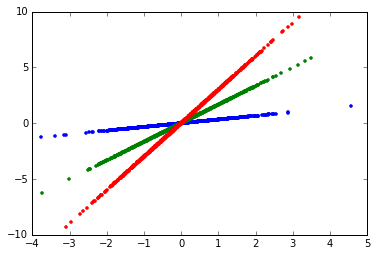

In [52]:
m = 1000
n = 3
XX = randn(m, n)
slopes = linspace(1./n, n, n)
Y = XX * slopes

%matplotlib inline
plot(XX, Y, '.')
XX.shape, Y.shape

In [59]:
X = pd.DataFrame(XX).stack()
X = X.reset_index(1)
X = X.values

y = pd.DataFrame(Y).stack()
y = y.values

X.shape, y.shape

((3000, 2), (3000,))

In [60]:
y = np.atleast_2d(y).T
y.shape, X.shape

((3000, 1), (3000, 2))

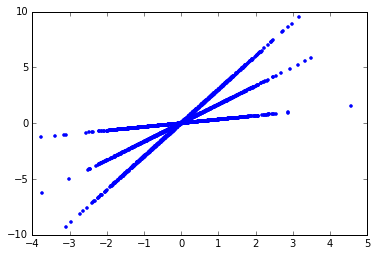

In [61]:
%matplotlib inline
plot(X[:,1], y, '.')
show()

In [62]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

/Users/davidcottrell/dev/scikit-learn.git/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [144]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

m = X_train.shape[1]
n = y_train.shape[1]

dims = [3, 3]
# dropout = 0.01

model = Sequential()
model.add(Dense(input_dim=m, output_dim=dims[0], init='glorot_uniform'))
model.add(Activation('tanh')) # relu not exist?
# model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[0], output_dim=dims[1], init='glorot_uniform'))
model.add(Activation('tanh'))
# model.add(Dropout(dropout))
# model.add(Dense(input_dim=dims[1], output_dim=dims[2], init='glorot_uniform'))
# model.add(Activation('tanh'))
# model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[0], output_dim=n, init='glorot_uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.1, decay=1e-4, momentum=0.5, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [145]:
out = model.fit(X_train, y_train, nb_epoch=100, batch_size=256, validation_data=(X_test, y_test), show_accuracy=True)

Train on 2700 samples, validate on 300 samples
Epoch 1/100
2700/2700 [==============================] - 0s - loss: 2.2895 - acc: 1.0000 - val_loss: 1.7457 - val_acc: 1.0000
Epoch 2/100
2700/2700 [==============================] - 0s - loss: 1.8284 - acc: 1.0000 - val_loss: 1.5290 - val_acc: 1.0000
Epoch 3/100
2700/2700 [==============================] - 0s - loss: 1.4066 - acc: 1.0000 - val_loss: 1.8232 - val_acc: 1.0000
Epoch 4/100
2700/2700 [==============================] - 0s - loss: 1.3750 - acc: 1.0000 - val_loss: 1.4192 - val_acc: 1.0000
Epoch 5/100
2700/2700 [==============================] - 0s - loss: 1.4616 - acc: 1.0000 - val_loss: 0.9572 - val_acc: 1.0000
Epoch 6/100
2700/2700 [==============================] - 0s - loss: 0.7158 - acc: 1.0000 - val_loss: 1.0763 - val_acc: 1.0000
Epoch 7/100
2700/2700 [==============================] - 0s - loss: 1.0365 - acc: 1.0000 - val_loss: 1.2060 - val_acc: 1.0000
Epoch 8/100
2700/2700 [==============================] - 0s - loss: 0.7

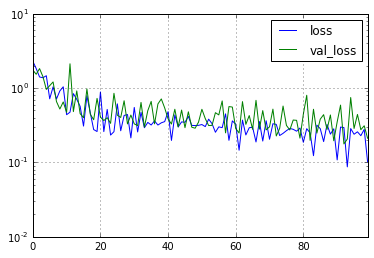

In [146]:
h = pandas.DataFrame(out.history)
h[['loss', 'val_loss']].plot(logy=True)
grid()

In [147]:
mse = lambda x: np.mean(x ** 2)
yp = model.predict(X_train)
ypt = model.predict(X_test)

res = dict(base=mse(y_train - np.mean(y_train)), train=mse(y_train - yp), test=mse(y_test - ypt))
res

{'base': 3.8609057325880882,
 'test': 0.21130464289032488,
 'train': 0.12099742345877354}

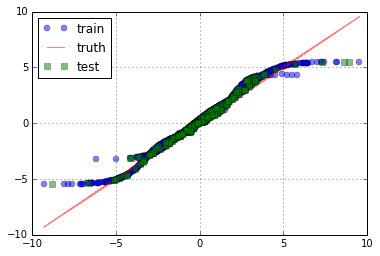

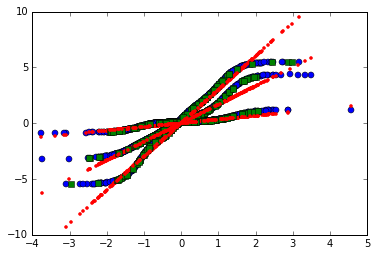

In [148]:
def do_pred_plot(X, y, Xt, yt):
    yp = model.predict(X)
    ypt = model.predict(Xt)
    %matplotlib inline
    for i in range(yp.shape[1]):
        figure()
        clf()
        plot(y[:,i], yp[:,i], 'o', alpha=0.5, label='train')
        plot(y[:,i], y[:,i], 'r-', alpha=0.5, label='truth')
        plot(yt[:,i], ypt[:,i], 'gs', alpha=0.5, label='test')
        grid()
        legend(loc=0)
    figure()
    plot(X_train[:,1], yp, 'o')
    plot(X_train[:,1], y_train, 'r.')
    plot(X_test[:,1], ypt, 'gs')
    plot(X_test[:,1], y_test, 'r.')
 
do_pred_plot(X_train, y_train, X_test, y_test)